In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Predator-Prey Model

This notebook is based on Module 4.2 in *Introduction to Computational Science* by Angela Shiflet and George Shiflet.

## Review

### Unconstrained Births

The rate of change of a population due to unconstrained births is proportional to the population and is positive since the population increases.

$$rate_b = \left(\frac{\Delta P}{\Delta t}\right)_b = r_bP \quad \mbox{due to births}$$

The constant $r_b$ is the proportionality constant.

### Unconstrained Deaths

The rate of change of a population due to uncontrained deaths is proportional to the population and is negative since the population decreases.

$$rate_d = \left(\frac{\Delta P}{\Delta t}\right)_d = - r_dP \quad \mbox{due to deaths}$$

The constant $r_d$ is the proportionality constant.

### Competition

The rate of change of the population of a species due to competition with another species is proportional to the product of the population of each species. If the populations are $P_1$ and $P_2$, then 

$$rate_{c1} = \left(\frac{\Delta P_1}{\Delta t}\right) = -r_{c1}P_1P_2 \quad \mbox{rate of change of population 1 due to competition}$$
$$rate_{c2} = \left(\frac{\Delta P_2}{\Delta t}\right) = -r_{c2}P_1P_2 \quad \mbox{rate of change of population 2 due to competition}$$

The constants $r_{c1}$ and $r_{c2}$ are the proportionality constants. The *c* refers to *competition*. The rate of change is negative since competition causes death, which is a *decrease* in the population.

### Summary

1. All of these processes might be included in a particular model. Thus, the total rate of change of a species is the sum of the rate of change due to each process included in the model.
2. When a process or interaction increases the population, the rate of change of the population is positive. When it decreases the population, the rate of change of the population is negative.
3. Each term in the rate of change of the population has a proportionality constant, $r$. This constant is always unique to the particular population, its environment, and its interactions. It's often measured in an experiment, or it's used as an adjustable parameter in a model.

## Predator-Prey Model

To model the populations of a predator and prey in an environment, you have to think about interactions and processes that affect the rate of change of the population of predators and prey. Birth, death, and interactions (like competition) can all affect the population.

Let's make a table to list all of the kinds of processes and interactions that will go into our model for each population of predator and prey. I will use the variable $p$ for prey population and $P$ for predator population.

Population | Process or Interaction | Associated Rate of Change | Proportionality Constant
--- | --- | --- | ---
prey (p) | unconstrained birth | $+(r_{p,b})p$ | $r_{p,b}$
prey (p) | deaths due to being eaten by predator | $-(r_{p,P})pP$ | $r_{p,P}$
Predator (P) | births due to eating prey | $+(r_{P,p})pP$ | $r_{P,p}$
Predator (P) | unconstrained death | $-(r_{P,d})P$ | $r_{P,d}$

In this model, the births of prey grow unconstrained, but death is due to being eaten by a predator and depends on the product of the population of prey and predator, $pP$. (The greater the number of predators, the more they eat, and the greater the number of prey, the more they eat.) It's basically a contrained death.

The births of predators depend on the abundance of both prey and predator, $pP$. If there is more prey to eat, there will be more births. If there are more predators, then there are also more births. It's basically a constrained growth. While births of predators are constrained by the population of prey, the deaths of predators are unconstrained since nothing is eating them.

The rate of change of each population is due to both birth and death, so we add each contribution to get the total rate of change. Again, $P$ is for predator population and $p$ is for prey population. The rate of change of each population is

$$rate_p = \frac{\Delta p}{\Delta t} = (r_{p,b})p - (r_{p,P})pP$$

$$rate_P = \frac{\Delta P}{\Delta t} = (r_{P,p})pP - (r_{P,d})P$$

### Hawks and Squirrels

Suppose hawks eat squirrels. Let's model the time-evolution of their populations. We'll use the following values for initial conditions and proportionality constants. The unit of time is a month. I will use the variables $S$ and $H$ to represent the squirrel and hawk populations.

Variable or Constant | Value (in appropriate units)
--- | ---
Initial squirrel population, $S$ | 100
Squirrel birth rate coefficient, $r_{S,b}$ | 2
Squirrel death rate coefficient due to being eaten, $r_{S,H}$ | 0.02
Initial hawk population, $H$ | 15
Hawk birth rate coefficient due to eating squirrels, $r_{H,S}$ | 0.01
Hawk death rate coefficient, $r_{H,d}$ | 1.06

Note that the subscripts for a coefficient, like $r_{H,S}$, represent the variable changing (hawks) due to the process (eating squirrels). So $r_{S,H}$ is the proportionality constant for squirrels that are dying due to the hawks. Often you have to create a naming convention for variables that make sense to you, and possibly to someone else once it's explained.

The rate of change of each population is due to both birth and death, so we add each contribution to get the total rate of change. Thus,

$$\dot{S} = \frac{\Delta S}{\Delta t} = (r_{S,b})S - (r_{S,H})SH$$

$$\dot{H} = \frac{\Delta H}{\Delta t} = (r_{H,S})SH - (r_{H,d})H$$

Now, let's do our calculations with code and graph the time-evolution of the population of hawks and squirrels.

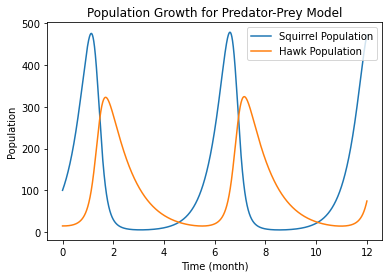

In [2]:
t = 0 
dt = 1/1000 #month

S = 100
r_Sb = 2
r_SH = 0.02

H = 15
r_HS = 0.01
r_Hd = 1.06

tmodel = []
Smodel = []
Hmodel = []

while t < 12:
    rateS = r_Sb*S - r_SH*S*H
    rateH = r_HS*S*H - r_Hd*H
    
    S = S + rateS*dt
    H = H + rateH*dt
    
    t = t + dt
    
    tmodel.append(t)
    Smodel.append(S)
    Hmodel.append(H)

fig = plt.figure()
plt.title("Population Growth for Predator-Prey Model")
plt.xlabel("Time (month)")
plt.ylabel("Population")
plt.plot(tmodel, Smodel, label='Squirrel Population')
plt.plot(tmodel, Hmodel, label='Hawk Population')
plt.legend()
plt.show()

It's important to study the graph and describe what happens.

**Between 0 and 1 month**, the squirrels grow unconstrained because the population of hawks is small in comparison. But the birth of hawks is proportional to the birth of squirrels, so soon (**between 1 month and 2 months**) the hawk population increases as more hawks are born. But the larger hawk population causes the death of squirrels, so the squirrel population decreases and is a minimum at $t=3$ months. In fact, **at 3 months, there are only about 5 squirrels**.

The decrease in squirrels reduces the births of hawks, and the unconstrained death of hawks outpaces their births. Therefore, the hawk population decreases which allows the squirrel population to increase as their births outpace their deaths. 

This process of predator population following the prey population repeats. In fact, you can say that their populations oscillate, with the change in one population affecting the other. This is due to the *interaction* terms in the rate of change equations where the death of squirrels and birth of hawks are both proportional to the product of the populations, $SH$. 



## Exercise 1

Page 123 of our textbook *Introduction to Computational Science* shows a different way to graph the predator-prey population relationsip. Plot the model data in `Smodel` and `Pmodel` in such a way that you reproduce Figure 4.2.3.

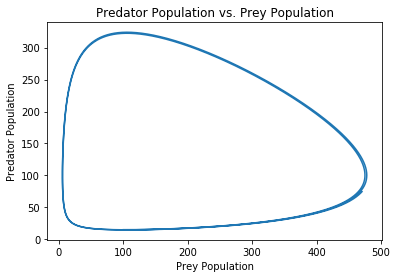

## Using a Python Function to Test Various Initial Conditions

In Exercise 2 below, we want to explore the result of our model using different initial populations. When you want to repeat code (but with different initial conditions or constants), it is best to put your code into a function. Then call that function, passing it the values you want to use for the initial conditions (or other constants.)

In the example below, I take our previous program for squirrels and hawks and put it into a function. I pass this function the initial populations of hawks and squirrels. Then I call the function every time I want to produce a new graph using different initial populations. It's far more convenient than copying and pasting a long block of code.

Here's the function. I named mine `graphPpTime`. While that might sound like the term a mathematician uses when graphing the success of a two-year old who is potty training, it actually refers to *Graph the Predator Prey Time* evolution.

In [6]:
def graphPpTime(S, H): #pass the initial values of S and H to the model
    t = 0 
    dt = 1/1000 #month

#    S = 100 # I commented out this line because the initial value of S is passed to the function
    r_Sb = 2
    r_SH = 0.02

#    H = 15 # I commented out this line because the initial value of H is passed to the function
    r_HS = 0.01
    r_Hd = 1.06

    tmodel = []
    Smodel = []
    Hmodel = []

    while t < 12:
        rateS = r_Sb*S - r_SH*S*H
        rateH = r_HS*S*H - r_Hd*H

        S = S + rateS*dt
        H = H + rateH*dt

        t = t + dt

        tmodel.append(t)
        Smodel.append(S)
        Hmodel.append(H)

    fig = plt.figure()
    plt.title("Population Growth for Predator-Prey Model")
    plt.xlabel("Time (month)")
    plt.ylabel("Population")
    plt.plot(tmodel, Smodel, label='Squirrel Population')
    plt.plot(tmodel, Hmodel, label='Hawk Population')
    plt.legend()
    plt.show()

To see the graph, you have to call the function with the initial values of squirrels and hawks, like this:

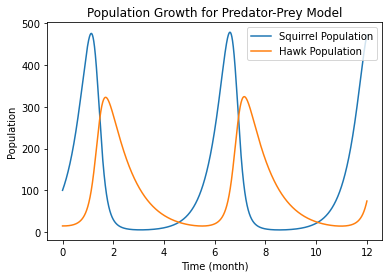

In [7]:
graphPpTime(100, 15) #initial (S,H) populations

Now you can try other values, like starting with 125 squirrels and 75 prey, as shown below.

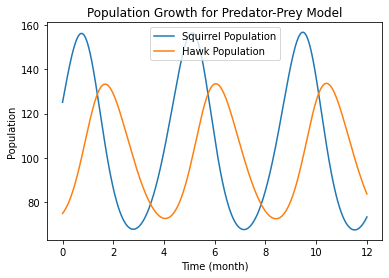

In [8]:
graphPpTime(125,75)

## 1.5 Exercise 2

In Exercise 1, you created a graph of predator population vs. prey population. The code below contains a function that takes the initial populations of squirrels and hawks and produces a graph of hawk population vs. squirrel population.

In [2]:
def graphPredPrey(S, H):
    t = 0 
    dt = 1/1000 #month

#    S = 100 # I commented out this line because the initial value of S is passed to the function
    r_Sb = 2
    r_SH = 0.02

#    H = 15 # I commented out this line because the initial value of H is passed to the function
    r_HS = 0.01
    r_Hd = 1.06

    tdata = []
    Sdata = []
    Hdata = []

    while t < 12:
        Sdot = r_Sb*S - r_SH*S*H
        Hdot = r_HS*S*H - r_Hd*H

        S = S + Sdot*dt
        H = H + Hdot*dt

        t = t + dt

        tdata.append(t)
        Sdata.append(S)
        Hdata.append(H)

    fig = plt.figure()
    plt.title("Population Growth for Predator-Prey Model")
    plt.xlabel("Prey Population")
    plt.ylabel("Predator Population")
    plt.plot(Sdata, Hdata)
    plt.show()

Call this function when you want to produce a population graph.

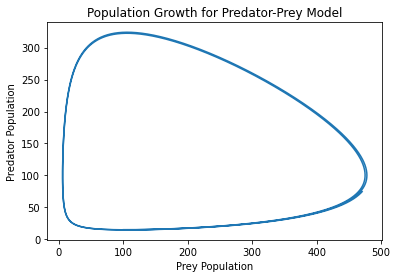

In [3]:
graphPredPrey(100, 15)

Page 124 of our textbook *Introduction to Computational Science* shows a few different results, depending on the initial populations of squirrels and hawks. Use the initial populations provided on pg. 124 to plot each curve. It's ok to make separate plots in your notebook.